In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import train and test datasets(CSV files)
train=pd.read_csv('./input/train (1).csv')
test=pd.read_csv("./input/test.csv")
train.describe(include="all")



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
752,753,0,3,"Vande Velde, Mr. Johannes Joseph",male,33.0,0,0,345780,9.5000,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S


In [5]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

percentage of females survived= 74.20382165605095
percentage of male survivors= 18.890814558058924


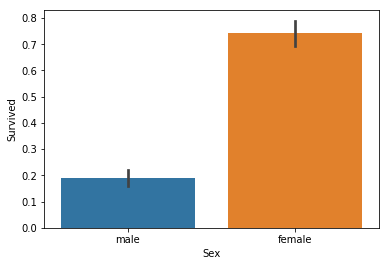

In [6]:
#data_visualization
sns.barplot(x="Sex",y="Survived",data=train)
#print percentage of male and female survivors
print("percentage of females survived=",train["Survived"][train["Sex"]=='female'].value_counts(normalize=True)[1]*100)
print("percentage of male survivors=",train["Survived"][train["Sex"]=='male'].value_counts(normalize=True)[1]*100)


In [ ]:
#conclusions
#no of females survived is larger than the number of males survived


percentage of people in p class=1 who have survived= 62.96296296296296
percentage of people in p class=2 who have survived= 47.28260869565217
percentage of people in p class=3 who have survived= 24.236252545824847


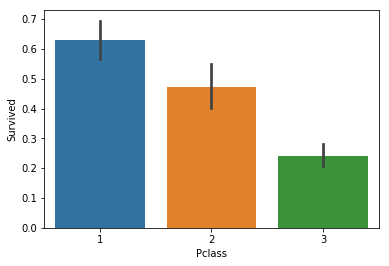

In [7]:
#p class feature
sns.barplot(x="Pclass",y="Survived",data=train)
print("percentage of people in p class=1 who have survived=",train["Survived"][train["Pclass"]==1].value_counts(normalize=True)[1]*100)
print("percentage of people in p class=2 who have survived=",train["Survived"][train["Pclass"]==2].value_counts(normalize=True)[1]*100)
print("percentage of people in p class=3 who have survived=",train["Survived"][train["Pclass"]==3].value_counts(normalize=True)[1]*100)


In [ ]:
#observations:people of higher socio economic class had a higher survival rate

percentage of people in SibSp=0 who have survived= 34.53947368421053
percentage of people in SibSp=1 who have survived= 53.588516746411486
percentage of people in SibSp=2 who have survived= 46.42857142857143


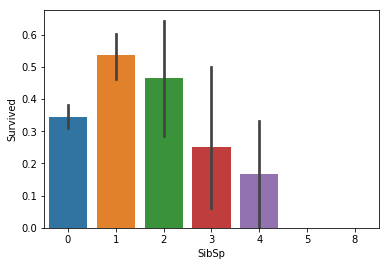

In [8]:
sns.barplot(x="SibSp",y="Survived",data=train)
print("percentage of people in SibSp=0 who have survived=",train["Survived"][train["SibSp"]==0].value_counts(normalize=True)[1]*100)
print("percentage of people in SibSp=1 who have survived=",train["Survived"][train["SibSp"]==1].value_counts(normalize=True)[1]*100)
print("percentage of people in SibSp=2 who have survived=",train["Survived"][train["SibSp"]==2].value_counts(normalize=True)[1]*100)


In [9]:
#observation: people with more siblings and spouses aboard was less likely to survive
#while people with no siblings are less likely to survive but people with one or 2 siblings are more likely to survive


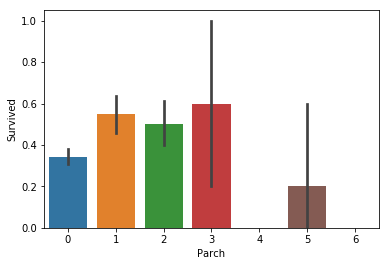

In [10]:
#parch
sns.barplot(x="Parch",y="Survived",data=train)
plt.show()

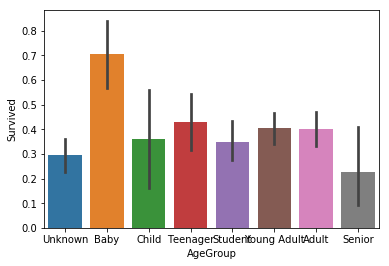

In [11]:
#age-age group
train["Age"]=train["Age"].fillna(-0.5)
test["Age"]=test["Age"].fillna(-0.5)
bins=[-1,0,5,12,18,24,35,60,np.inf]
labels=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
train["AgeGroup"]=pd.cut(train["Age"],bins,labels=labels)
test["AgeGroup"]=pd.cut(train["Age"],bins,labels=labels)
sns.barplot(x="AgeGroup",y="Survived",data=train)

In [ ]:
#babies are more likely to survive


Percentage of people survived in cabinbool=1 66.66666666666666
Percentage of people survived in cabinbool=0 29.985443959243085


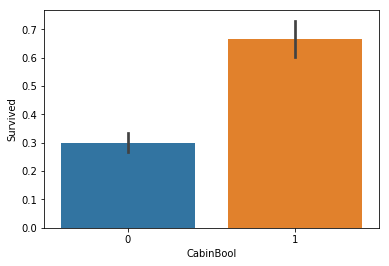

In [12]:
#convert cabin names to int
train["CabinBool"]=(train["Cabin"].notnull().astype('int'))
test["CabinBool"]=(test["Cabin"].notnull().astype('int'))
print("Percentage of people survived in cabinbool=1",train["Survived"][train["CabinBool"]==1].value_counts(normalize=True)[1]*100)
print("Percentage of people survived in cabinbool=0",train["Survived"][train["CabinBool"]==0].value_counts(normalize=True)[1]*100)
sns.barplot(x="CabinBool",y="Survived",data=train)
plt.show()

In [ ]:
#observations:


In [13]:
#cleaning of data
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Enander, Mr. Ingvar",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,100,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [14]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,-0.5,1,9,CA. 2343,69.55,NaN,S,Young Adult,0
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.05,NaN,S,Adult,0
62,954,3,"Bjorklund, Mr. Ernst Herbert",male,18.0,0,0,347090,7.75,NaN,S,Adult,0
183,1075,3,"Lane, Mr. Patrick",male,-0.5,0,0,7935,7.75,NaN,Q,Baby,0
268,1160,3,"Howard, Miss. May Elizabeth",female,-0.5,0,0,A. 2. 39186,8.05,NaN,S,Adult,0


In [ ]:
# we will remove the cabin feature from the train and the test datasets coz there is a lot of nan values.. nd it is not very useful for our prediction


In [15]:
train=train.drop(["Cabin"],axis=1)
test=test.drop(["Cabin"],axis=1)

In [16]:
#remove ticket feature
train=train.drop(["Ticket"],axis=1)
test=test.drop(["Ticket"],axis=1)

In [17]:
#print("no of people embarking in Southampton (S):")
#southampton=train[train["Embarked"]=="S"].shape[0]
#print(southampton)
#cali=train[train["Embarked"]=="C"].value_counts()
train['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
#fill the nan values with S
train=train.fillna({"Embarked":"S"})


In [19]:
combine=[train,test]
for data in combine:
    data['Title']=data.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Col','Capt','Dr','Jonkheer','Major','Don','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title']=dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.357143
5,Rev,0.000000
6,Royal,1.000000


In [21]:
#mapping each of the title groups to a numberical value
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Royal":5,"Rare":6}
for data in combine:
    data['Title']=data['Title'].map(title_mapping)
    data['Title']=data['Title'].fillna(0)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Student,0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Adult,0,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Young Adult,0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Young Adult,0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Young Adult,0,3.0


In [22]:
#fill missing values in the age groups
mr_age=train[train['Title']==1]["AgeGroup"].mode()
miss_age=train[train['Title']==2]["AgeGroup"].mode()
mrs_age=train[train['Title']==3]["AgeGroup"].mode()
master_age=train[train['Title']==4]["AgeGroup"].mode()
royal_age=train[train['Title']==5]["AgeGroup"].mode()
rare_age =train[train['Title']==6]["AgeGroup"].mode() 
age_title_mapping={1:"Young Adult",2:"Student",3:"Adult",4:"Baby",5:"Adult",6:"Adult"}
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x]=="Unknown":
        train["AgeGroup"][x]=age_title_mapping[train["Title"][x]]
for x in range(len("AgeGroup")):
    if test["AgeGroup"][x]=="Unknown":
        test["AgeGroup"][x]=age_title_mapping[train['Title'][x]]
train.head()

    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1.0


In [23]:
age_mapping={'Baby':1,'Child':2,'Teenager':3,'Student':4,'Young Adult':5,'Adult':6,'Senior':7}
train['AgeGroup']=train['AgeGroup'].map(age_mapping)
test['AgeGroup']=test['AgeGroup'].map(age_mapping)
train.head()
train=train.drop(['Age'],axis=1)
test=test.drop(['Age'],axis=1)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5,0,1.0


In [25]:
#drop the name function as it contains no more useful info
train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)


In [26]:
#sex_mapping
sex_map={'male':0,'female':1}
train['Sex']=train['Sex'].map(sex_map)
test['Sex']=test['Sex'].map(sex_map)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4,0,1.0
1,2,1,1,1,1,0,71.2833,C,6,1,3.0
2,3,1,3,1,0,0,7.9250,S,5,0,2.0
3,4,1,1,1,1,0,53.1000,S,5,1,3.0
4,5,0,3,0,0,0,8.0500,S,5,0,1.0


In [27]:
#embarked mapping
embark_mapping={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(embark_mapping)
test['Embarked']=test['Embarked'].map(embark_mapping)
test.head()


,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,892,3,0,0,0,7.8292,3,4.0,0,1.0
1,893,3,1,1,0,7.0000,1,6.0,0,3.0
2,894,2,0,0,0,9.6875,3,5.0,0,1.0
3,895,3,0,0,0,8.6625,1,5.0,0,1.0
4,896,3,1,1,1,12.2875,1,5.0,0,3.0


In [28]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass=test["Pclass"][x]
        test["Fare"][x]=round(train[train["Pclass"]==pclass]["Fare"].mean(),4)
train["FareBand"]=pd.qcut(train["Fare"],4,labels=[1,2,3,4])
test["FareBand"]=pd.qcut(test["Fare"],4,labels=[1,2,3,4])
train=train.drop(["Fare"],axis=1)
test=test.drop(["Fare"],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1.0,1
1,2,1,1,1,1,0,2,6,1,3.0,4
2,3,1,3,1,0,0,1,5,0,2.0,2
3,4,1,1,1,1,0,1,5,1,3.0,4
4,5,0,3,0,0,0,1,5,0,1.0,2


In [38]:
#splitting the train data into cross validation
from sklearn.model_selection import train_test_split
prediction=train.drop(['Survived','PassengerId'],axis=1)
#prediction.head()
target=train["Survived"]
x_tr,x_test,y_train,y_test=train_test_split(prediction,target,test_size=0.22,random_state=0)

C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


optimal_k=33


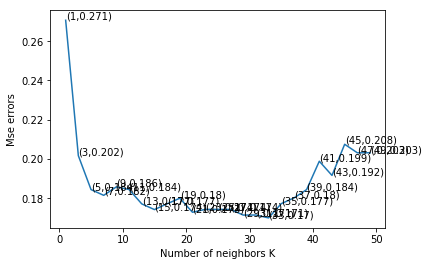

83.24873096446701


In [30]:
#knn
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def k_classfier_brute(x_tr,y_train):
    mylist=list(range(0,50))

    neighbors=list(filter(lambda x:x%2!=0,mylist))

    cv_scores = []

    for k in neighbors:
        knn=KNeighborsClassifier(n_neighbors=k)
        scores=cross_val_score(knn,x_tr,y_train,cv=10,scoring='accuracy')
        cv_scores.append(scores.mean())

    MSE=[1-x for x in cv_scores]

    optimal_k=neighbors[MSE.index(min(MSE))]

    print("optimal_k=%d"% optimal_k)

    plt.plot(neighbors,MSE)

    for xy in zip(neighbors,np.round(MSE,3)):
        plt.annotate('(%s,%s)'%xy,xy=xy,textcoords='data')

    plt.xlabel('Number of neighbors K')

    plt.ylabel("Mse errors")

    plt.show() 
    return optimal_k
knn_op=k_classfier_brute(x_tr,y_train)
knn=KNeighborsClassifier(n_neighbors=knn_op)
knn.fit(x_tr,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(pred,y_test)*100
print(acc)

In [43]:
#METHOD 1 :lOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV 
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
#data=load_breast_cancer()
#tuned_para=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
#x_tr,x_test,y_tr,y_test=train_test_split(data.data,data.target,test_size=0.5,random_state=0)
#model=GridSearchCV(LogisticRegression(),tuned_para,scoring='accuracy')
log=LogisticRegression()
log.fit(x_tr,y_train)
y_pred=log.predict(x_test)
acc2=accuracy_score(y_pred,y_test)
print(acc2)
#print(model.best_estimator_)
#print(model.score(x_test,y_test))
#x_tr

0.8071065989847716


In [32]:
#METHOD 2:LOGISTIC REGRESSION usin GRIDSEARCHCV
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV 
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
tuned_para=[{'C':[10**-4,10**-2,10**0,10**2,10**-2]}]
model=GridSearchCV(LogisticRegression(penalty='l1'),tuned_para,scoring='accuracy')
model.fit(x_tr,y_train)
print(model.best_estimator_)
print(model.score(x_test,y_test))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8121827411167513


In [56]:
import pickle
from  xgboost import XGBClassifier

In [58]:
xgb_model=XGBClassifier()
xgb_model.fit(x_tr,y_train)
pred=xgb_model.predict(x_test)



ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields FareBand

In [50]:
from sklearn import svm
#X = [[0, 0], [1, 1]]
#y = [0, 1]
clf = svm.SVC()
clf.fit(x_tr,y_train)
pred=clf.predict(x_test)
acc2=accuracy_score(pred,y_test)
acc2*100

81.7258883248731